In [8]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [9]:
# Load the Excel file
df = pd.read_excel(r"C:\Users\jyoth\OneDrive\Documents\Combined_Data_telugu.xlsx")

In [3]:
# Check the shape of the data:
df.shape

(53043, 3)

In [4]:
df.head()

,Unnamed: 0,statement,status
0,0,అయ్యో,ఆందోళన
1,1,"నిద్రకు ఇబ్బంది, గందరగోళంగా ఉన్న మనస్సు, చంచలమ...",ఆందోళన
2,2,"అన్ని తప్పు, వెనుకకు డియర్, ఫార్వర్డ్ డౌట్. చం...",ఆందోళన
3,3,"నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను, కానీ ...",ఆందోళన
4,4,"నేను అశాంతి మరియు అశాంతిగా ఉన్నాను, ఇది ఒక నెల...",ఆందోళన


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   53042 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.T.duplicated().sum()

0

In [8]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0    0
statement     1
status        0
dtype: int64


In [9]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

statement    0.001885
dtype: float64

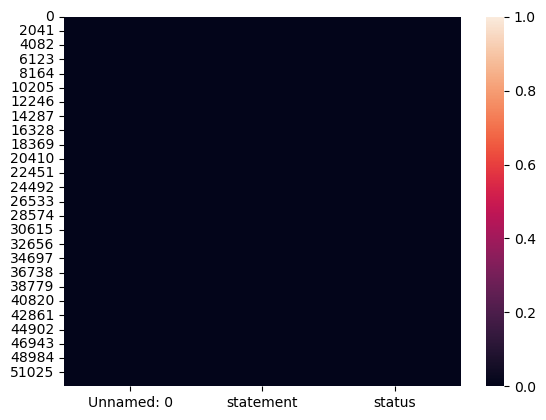

In [12]:
# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.show()

In [10]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [14]:
# Loop through all categorical columns in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Print the count of unique values in each column
    print(df[column].value_counts())

statement
#VALUE!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [11]:
df['status'].unique()

array(['ఆందోళన', 'సాధారణ', 'డిప్రెషన్', 'ఆత్మహత్య', 'ఒత్తిడి', 'బైపోలార్',
       'వ్యక్తిత్వ క్రమరాహిత్యం'], dtype=object)

In [12]:
df['status'].value_counts()

status
సాధారణ                     16351
డిప్రెషన్                  15404
ఆత్మహత్య                   10653
ఆందోళన                      3888
బైపోలార్                    2877
ఒత్తిడి                     2669
వ్యక్తిత్వ క్రమరాహిత్యం     1201
Name: count, dtype: int64

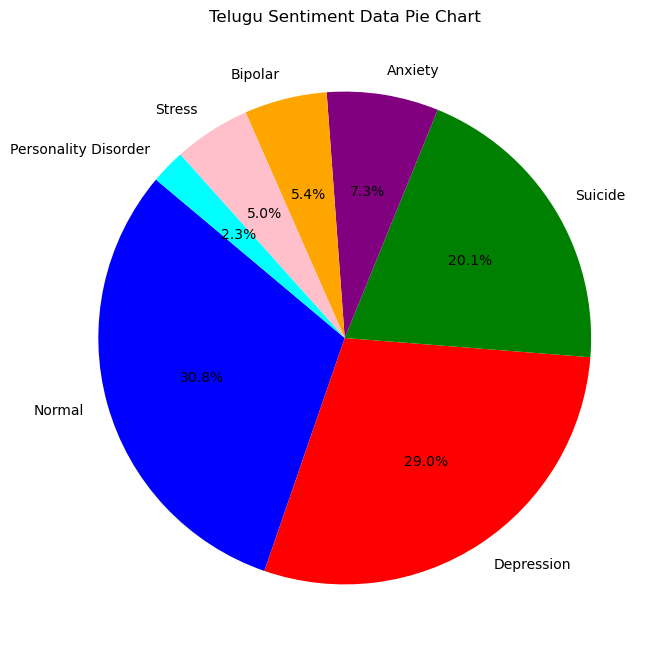

In [17]:
import matplotlib.pyplot as plt

# Data
labels = ['Normal', 'Depression', 'Suicide', 'Anxiety', 'Bipolar', 'Stress', 'Personality Disorder']
values = [16351, 15404, 10653, 3888, 2877, 2669, 1201]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'purple', 'orange', 'pink', 'cyan'])
plt.title('Telugu Sentiment Data Pie Chart')
plt.show()


In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

# Load dataset
file_path = r"C:\Users\jyoth\OneDrive\Documents\Combined_Data_telugu.xlsx"
df = pd.read_excel(file_path)

# Ensure correct column names
df.columns = df.columns.str.strip()
if 'statement' not in df.columns:
    raise ValueError("Error: 'statement' column not found!")

# Telugu stopwords we will extend as needed
telugu_stopwords = set(["ఉంది", "ఇది", "అంటే", "కాని", "మాత్రం", "కూడా", "మీ", "నాకు", "తప్ప", "అయినా", "కాదు", "నిజం", "వంటి", "అలాగే", "మరియు", "గురించి", "చేసింది", "వారు", "తన", "అవి", "దీని", "ద్వారా", "అక్కడ", "ఇక్కడ", "ఎవరైనా", "ఎందుకు"])

# Function to clean text
def preprocess_telugu_text(text):
    if pd.isna(text):  
        return ""  
    # Remove special characters, numbers, emojis, and punctuations
    text = re.sub(r'[^\u0C00-\u0C7F\s]', '', text)  # Keep only Telugu characters and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    # Remove stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in telugu_stopwords]
    return ' '.join(cleaned_words)

# Apply preprocessing
df['cleaned_statement'] = df['statement'].astype(str).apply(preprocess_telugu_text)

# Drop empty rows after preprocessing
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.dropna(subset=['cleaned_statement'], inplace=True)

# Tokenization using NLTK
nltk.download('punkt')
df['tokenized_statement'] = df['cleaned_statement'].apply(lambda x: word_tokenize(x, preserve_line=True))

# Save processed dataset
output_path = r"C:\Users\jyoth\Downloads\processed_nlp_dataset.xlsx"
df.to_excel(output_path, index=False)

print("Preprocessing and Tokenization Completed Successfully!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jyoth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing and Tokenization Completed Successfully!


In [15]:
# Print original, cleaned, and tokenized text
for index, row in df.head(10).iterrows():
    print(f"Original: {row['statement']}")
    print(f"Cleaned: {row['cleaned_statement']}")
    print(f"Tokens: {row['tokenized_statement']}")
    print("-")


Original: అయ్యో
Cleaned: అయ్యో
Tokens: ['అయ్యో']
-
Original: నిద్రకు ఇబ్బంది, గందరగోళంగా ఉన్న మనస్సు, చంచలమైన హృదయం. అన్నీ శృతి మించాయి
Cleaned: నిద్రకు ఇబ్బంది గందరగోళంగా ఉన్న మనస్సు చంచలమైన హృదయం అన్నీ శృతి మించాయి
Tokens: ['నిద్రకు', 'ఇబ్బంది', 'గందరగోళంగా', 'ఉన్న', 'మనస్సు', 'చంచలమైన', 'హృదయం', 'అన్నీ', 'శృతి', 'మించాయి']
-
Original: అన్ని తప్పు, వెనుకకు డియర్, ఫార్వర్డ్ డౌట్. చంచలమైన మరియు చంచలమైన ప్రదేశంలో ఉండండి
Cleaned: అన్ని తప్పు వెనుకకు డియర్ ఫార్వర్డ్ డౌట్ చంచలమైన చంచలమైన ప్రదేశంలో ఉండండి
Tokens: ['అన్ని', 'తప్పు', 'వెనుకకు', 'డియర్', 'ఫార్వర్డ్', 'డౌట్', 'చంచలమైన', 'చంచలమైన', 'ప్రదేశంలో', 'ఉండండి']
-
Original: నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను, కానీ నేను ఇంకా ఆందోళన చెందుతున్నాను
Cleaned: నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను కానీ నేను ఇంకా ఆందోళన చెందుతున్నాను
Tokens: ['నేను', 'నా', 'దృష్టిని', 'వేరొకదానిపైకి', 'మార్చాను', 'కానీ', 'నేను', 'ఇంకా', 'ఆందోళన', 'చెందుతున్నాను']
-
Original: నేను అశాంతి మరియు అశాంతిగా ఉన్నాను, ఇది ఒక నెల అయ్యింది, అబ్బాయి. మీ ఉద్దేశ్యం ఏ

In [13]:
print(df.columns)

Index(['Unnamed: 0', 'statement', 'status', 'cleaned_statement',
       'tokenized_statement'],
      dtype='object')


In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Load preprocessed dataset
preprocessed_file_path = r"C:\Users\jyoth\Downloads\processed_nlp_dataset.xlsx"
df = pd.read_excel(preprocessed_file_path)

# Ensure correct column names
df.columns = df.columns.str.strip()
if 'cleaned_statement' not in df.columns:
    raise ValueError("Error: 'cleaned_statement' column not found in the preprocessed dataset!")

# Download tokenizer package
nltk.download('punkt')

# ✅ Tokenization using preserve_line to avoid LookupError
df['tokenized_statement'] = df['cleaned_statement'].apply(lambda x: word_tokenize(str(x), preserve_line=True))

# Print tokenized text
for index, row in df.head(10).iterrows():
    print(f"Cleaned: {row['cleaned_statement']}")
    print(f"Tokens: {row['tokenized_statement']}")
    print("-")

print("✅ Tokenization Completed and Displayed Successfully!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jyoth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaned: అయ్యో
Tokens: ['అయ్యో']
-
Cleaned: నిద్రకు ఇబ్బంది గందరగోళంగా ఉన్న మనస్సు చంచలమైన హృదయం అన్నీ శృతి మించాయి
Tokens: ['నిద్రకు', 'ఇబ్బంది', 'గందరగోళంగా', 'ఉన్న', 'మనస్సు', 'చంచలమైన', 'హృదయం', 'అన్నీ', 'శృతి', 'మించాయి']
-
Cleaned: అన్ని తప్పు వెనుకకు డియర్ ఫార్వర్డ్ డౌట్ చంచలమైన చంచలమైన ప్రదేశంలో ఉండండి
Tokens: ['అన్ని', 'తప్పు', 'వెనుకకు', 'డియర్', 'ఫార్వర్డ్', 'డౌట్', 'చంచలమైన', 'చంచలమైన', 'ప్రదేశంలో', 'ఉండండి']
-
Cleaned: నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను కానీ నేను ఇంకా ఆందోళన చెందుతున్నాను
Tokens: ['నేను', 'నా', 'దృష్టిని', 'వేరొకదానిపైకి', 'మార్చాను', 'కానీ', 'నేను', 'ఇంకా', 'ఆందోళన', 'చెందుతున్నాను']
-
Cleaned: నేను అశాంతి అశాంతిగా ఉన్నాను ఒక నెల అయ్యింది అబ్బాయి ఉద్దేశ్యం ఏమిటి
Tokens: ['నేను', 'అశాంతి', 'అశాంతిగా', 'ఉన్నాను', 'ఒక', 'నెల', 'అయ్యింది', 'అబ్బాయి', 'ఉద్దేశ్యం', 'ఏమిటి']
-
Cleaned: ప్రతి విరామంలో ఏదో తప్పు జరిగినట్లు మీరు భయపడి ఉండాలి కానీ ఏమి లేదు
Tokens: ['ప్రతి', 'విరామంలో', 'ఏదో', 'తప్పు', 'జరిగినట్లు', 'మీరు', 'భయపడి', 'ఉండాలి', 'కానీ', 'ఏమి', 'లేద

In [17]:
from collections import Counter

# Create dictionary to store word counts by status
word_count = {}

# Loop through each unique sentiment status (e.g., Happy, Sad)
for status in df['status'].unique():
    all_words = []

    # Collect all words for the current status
    for tokens in df[df['status'] == status]['tokenized_statement']:
        all_words.extend(tokens)

    # Count most common 15 words
    top_words = Counter(all_words).most_common(15)

    # Store for plotting
    word_count[f"{status}_words"] = [w for w, _ in top_words]
    word_count[f"{status}_count"] = [c for _, c in top_words]


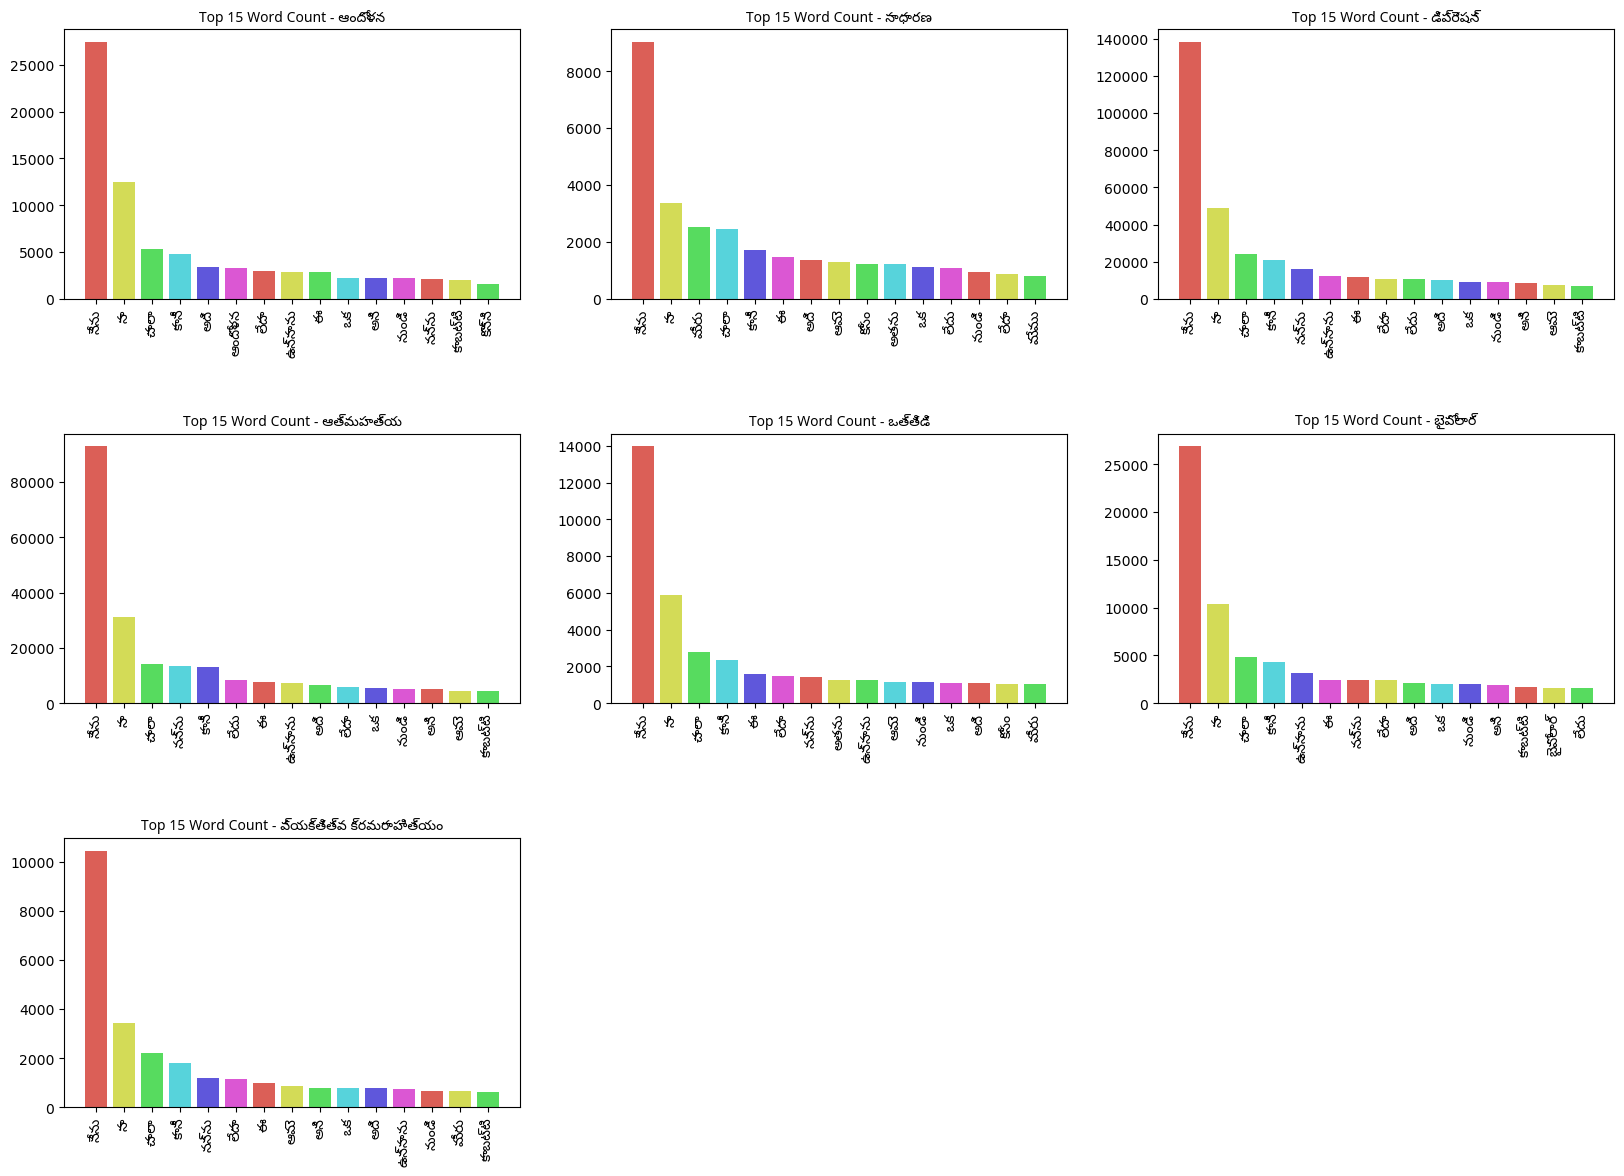

In [22]:
plt.figure(figsize=(20, 14))
i = 1

unique_status = df['status'].unique()
for status in unique_status:
    plt.subplot(3, 3, i)
    plt.title(f'Top 15 Word Count - {status}', fontsize=14, fontproperties=telugu_font)
    plt.bar(word_count[f'{status}_words'], word_count[f'{status}_count'], color=sns.color_palette('hls'))
    plt.xticks(rotation=90, fontsize=12, fontproperties=telugu_font)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()


In [18]:
plt.rcParams['font.family'] = 'Noto Sans Telugu'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# Load preprocessed dataset
preprocessed_file_path = r"C:\Users\jyoth\Downloads\processed_nlp_dataset.xlsx"
df = pd.read_excel(preprocessed_file_path)

# Ensure correct column names
df.columns = df.columns.str.strip()
if 'cleaned_statement' not in df.columns:
    raise ValueError("Error: 'cleaned_statement' column not found in the preprocessed dataset!")
if 'status' not in df.columns:
    raise ValueError("Error: 'status' column not found in the dataset!")

# Set font that supports Telugu
telugu_font_path = r"C:\Users\jyoth\Downloads\Noto_Sans_Telugu\NotoSansTelugu-VariableFont_wdth,wght.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path)

# Extract word count feature
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(str(x).split()))

# Get unique sentiment/emotion labels
unique_status = df['status'].unique()

# Store words per status
words_status = {}
word_count = pd.DataFrame()

for status in unique_status:
    word_dict = {}
    word_ls = []
    
    # Filter data for the specific status
    s_data = df[df['status'] == status]
    
    # Concatenate all words
    all_words = ' '.join(s_data['cleaned_statement'].astype(str))
    
    # Count word occurrences
    for word in all_words.split():
        word_dict[word] = word_dict.get(word, 0) + 1
        word_ls.append(word)
    
    words_status[status] = ' '.join(word_ls)
    
    # Get top 15 words
    sorted_words = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
    word_top_count = pd.DataFrame(sorted_words[:15], columns=[f'{status}_words', f'{status}_count'])
    
    # Concatenate results
    word_count = pd.concat([word_count, word_top_count], axis=1)

# Plot word counts
plt.figure(figsize=(20, 14))
i = 1

for status in unique_status:
    plt.subplot(3, 3, i)
    plt.title(f'Top 15 Word Count - {status}', fontsize=14, fontproperties=telugu_font)
    plt.bar(word_count[f'{status}_words'], word_count[f'{status}_count'], color=sns.color_palette('hls'))
    plt.xticks(rotation=90, fontsize=12, fontproperties=telugu_font)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()


findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.
findfont: Font family 'Noto Sans Telugu' not found.


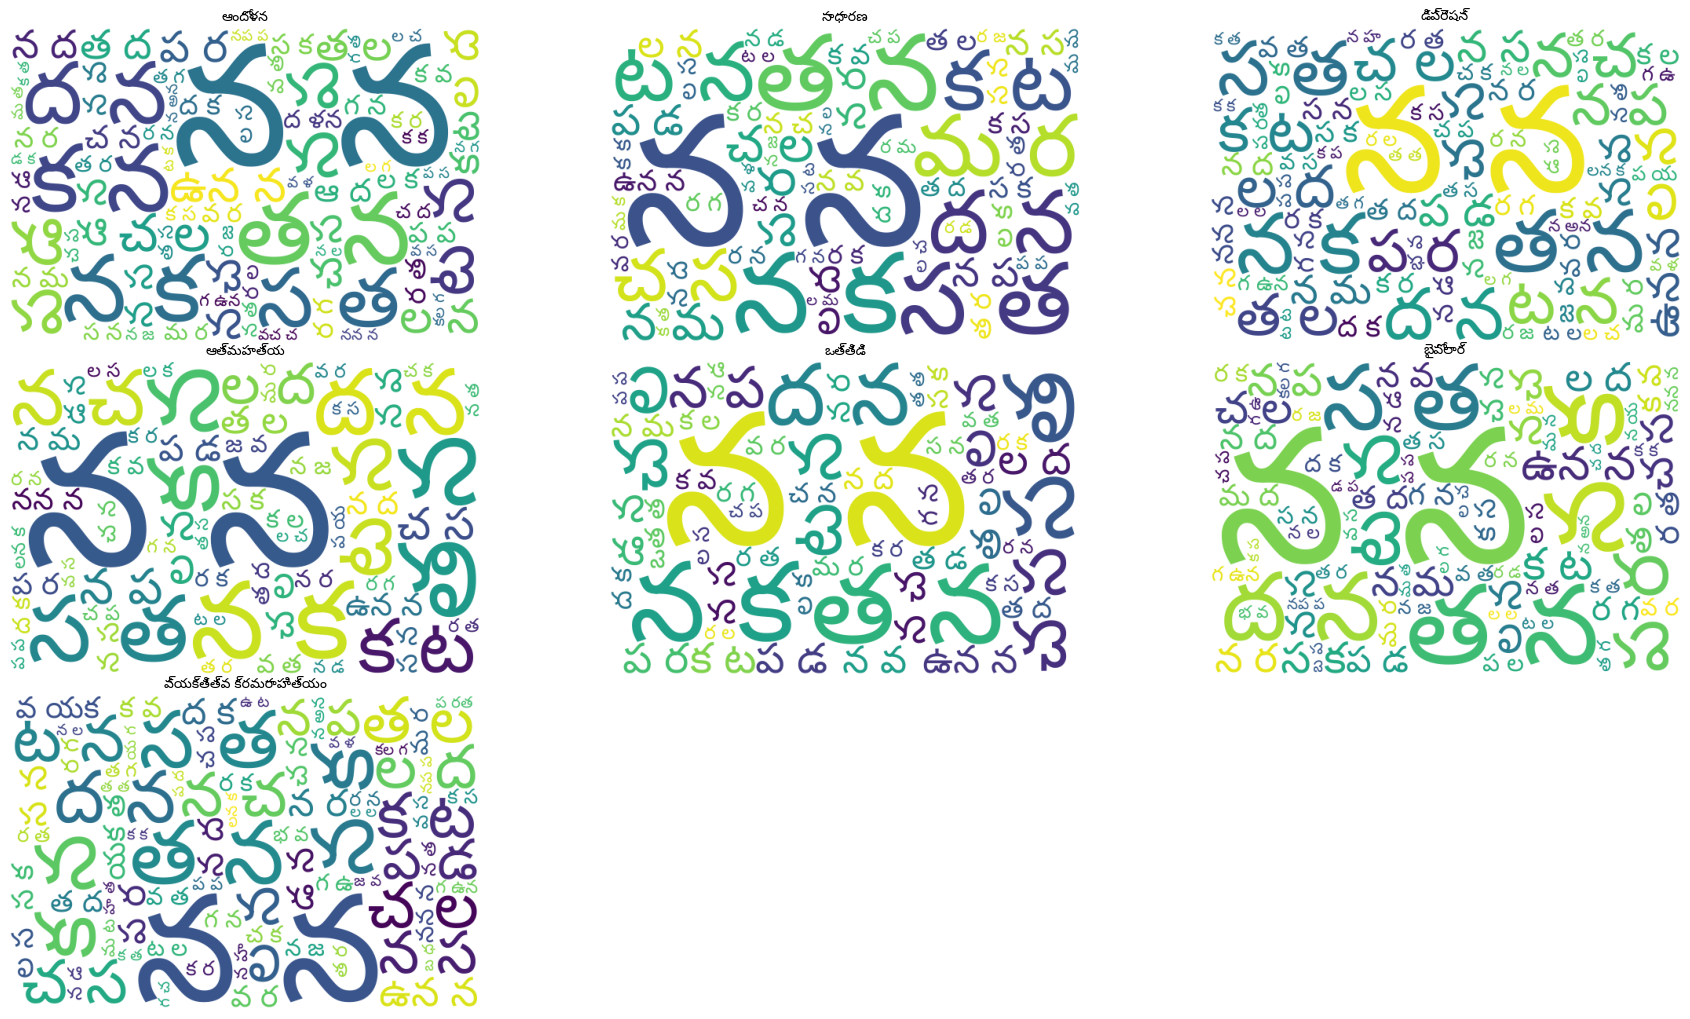

In [27]:
from wordcloud import WordCloud
# Generate and display word clouds with Telugu font
plt.figure(figsize=(18, 10))
i = 1
for status in words_status:
    plt.subplot(3, 3, i)
    w = words_status[status]
    wordcloud = WordCloud(width=600, height=400,
                          background_color='white',
                          min_font_size=20,
                          font_path=telugu_font_path # Add Telugu font path here
                          ).generate(w)
    # Plot the WordCloud image                        
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(status, fontsize=18, fontproperties=telugu_font)
    plt.tight_layout(pad=0)
    i += 1
plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Apply CountVectorizer and TfidfTransformer
count = CountVectorizer()
count.fit(df['cleaned_statement'])
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf.fit(count.transform(df['cleaned_statement']))
np.set_printoptions(precision=2)
tfidf_words = tfidf.transform(count.transform(df['cleaned_statement']))

In [21]:
import pandas as pd
from scipy.sparse import hstack

# Sentence length (number of words)
df['sentence_len'] = df['cleaned_statement'].apply(lambda x: len(x.split()))    

# Average word length
df['avg_word_len'] = df['cleaned_statement'].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)

# Convert to array and reshape to 2D
lexical_features = df[['sentence_len', 'avg_word_len']].values


In [22]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.Collecting transformers
  Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
    --------------------------------------- 0.3/10.8 MB ? eta -:--:--
    --------------------------------------- 0.3/10.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.8 MB 932.9 kB/s eta 0:00:12
   - -------------------------------------- 0.5/10.8 MB 932.9 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/10.8 MB 729.2 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/10.8 MB 729.2 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/10.8 MB 718.9 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/10.8 MB 713.8 kB/s eta 0:00:14
   ----- ---------------------------------- 1.6/10.8 MB 769.7 kB/s eta 0:00:13
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip uninstall transformers accelerate torch -y

Found existing installation: transformers 4.53.0Note: you may need to restart the kernel to use updated packages.

Uninstalling transformers-4.53.0:
  Successfully uninstalled transformers-4.53.0
Found existing installation: accelerate 1.8.1
Uninstalling accelerate-1.8.1:
  Successfully uninstalled accelerate-1.8.1
Found existing installation: torch 2.7.1
Uninstalling torch-2.7.1:
  Successfully uninstalled torch-2.7.1


In [7]:
pip install transformers==4.36.2 accelerate==0.26.1 torch==2.1.2


   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.2 MB 730.2 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/8.2 MB 730.2 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/8.2 MB 730.2 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.2 MB 486.4 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.2 MB 486.4 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.2 MB 553.0 kB/s eta 0:00:13
   ----- ---------------------------------- 1.0/8.2 MB 553.0 kB/s eta 0:00:13
   ------ --------------------------------- 1.3/8.2 MB 524.3 kB/s eta 0:00:14
   ------ --------------------------------- 1.3/8.2 MB 524.3 kB/s eta 0:00:14
   ------- ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.5/192.2 MB 208.2 kB/s eta 0:13:40
   ---- ---------------------------------- 21.8/192.2 MB 186.3 kB/s eta 0:15:16
   ---- ---------------------------------- 21.8/192.2 MB 186.3 kB/s eta 0:15:16
   ---- ---------------------------------- 21.8/192.2 MB 186.3 kB/s eta 0:15:16
   ---- ---------------------------------- 21.8/192.2 MB 186.3 kB/s eta 0:15:16
   ---- ---------------------------------- 21.8/192.2 MB 186.3 kB/s eta 0:15:16
   ---- -------------------------------

In [9]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load MuRIL tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModel.from_pretrained("google/muril-base-cased")
model.eval()

# Function to get [CLS] token embedding
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_dim]
    return cls_embedding.squeeze().numpy()

# Example Telugu text
telugu_text = "ఈ రోజు నాకు చాలా బాధగా ఉంది."
embedding = get_embedding(telugu_text)
print("Embedding shape:", embedding.shape)

Embedding shape: (768,)


In [12]:
!pip install stanza

In [1]:
import stanza
stanza.download('te')

C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-01 13:09:36 INFO: Downloaded file to C:\Users\jyoth\stanza_resources\resources.json
2025-07-01 13:09:36 INFO: Downloading default packages for language: te (Telugu) ...
2025-07-01 13:10:44 INFO: Downloaded file to C:\Users\jyoth\stanza_resources\te\default.zip
2025-07-01 13:10:58 INFO: Finished downloading models and saved to C:\Users\jyoth\stanza_resources


In [2]:
import stanza

# Load pipeline
nlp = stanza.Pipeline('te')

2025-07-01 13:12:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-07-01 13:12:21 INFO: Downloaded file to C:\Users\jyoth\stanza_resources\resources.json
2025-07-01 13:12:23 INFO: Loading these models for language: te (Telugu):
| Processor | Package      |
----------------------------
| tokenize  | mtg          |
| pos       | mtg_charlm   |
| lemma     | identity     |
| depparse  | mtg_charlm   |
| ner       | ilner_charlm |

2025-07-01 13:12:23 INFO: Using device: cpu
2025-07-01 13:12:23 INFO: Loading: tokenize
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_stor

In [1]:
pip install transformers torch pandas

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd

# Load MuRIL model and tokenizer
model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Sample Telugu sentences
sentences = [
    "నేను చాలా హ్యాపీగా ఉన్నాను",  # I am very happy
    "ఇది నన్ను బాధపెట్టింది",    # This made me sad
    "నాకు ఉక్కిరిబిక్కిరిగా ఉంది",  # I feel anxious
]

# Function to get sentence embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling of last hidden state
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().numpy()

# Generate and save
embeddings = [get_embedding(sent) for sent in sentences]
df = pd.DataFrame(embeddings)
df.to_csv("muril_embeddings_partial.csv", index=False, header=False)

print("Saved MuRIL embeddings to muril_embeddings_partial.csv")


C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Saved MuRIL embeddings to muril_embeddings_partial.csv


In [4]:
pip install pyarrow


   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.8 MB 8.5 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/25.8 MB 6.5 MB/s eta 0:00:04
   ----- ---------------------------------- 3.7/25.8 MB 7.3 MB/s eta 0:00:04
   -------- ------------------------------- 5.2/25.8 MB 7.2 MB/s eta 0:00:03
   --------- ------------------------------ 6.3/25.8 MB 6.8 MB/s eta 0:00:03
   ------------ --------------------------- 7.9/25.8 MB 6.9 MB/s eta 0:00:03
   -------------- ------------------------- 9.4/25.8 MB 6.8 MB/s eta 0:00:03
   ----------------- ---------------------- 11.3/25.8 MB 7.1 MB/s eta 0:00:03
   ------------------- -------------------- 12.8/25.8 MB 7.4 MB/s eta 0:00:02
   ----------------------- ---------------- 14.9/25.8 MB 7.5 MB/s eta 0:00:02
   ------------------------- -------------- 16.3/25.8 MB 7.3 MB/s eta 0:00:02
   --------------------------- ------------ 17.8/25.8 MB 7.3 MB/s eta 0:00:02


In [5]:
import pandas as pd

# Load existing CSV
csv_path = "muril_embeddings_partial.csv"
parquet_path = "muril_embeddings_partial.parquet"

df_csv = pd.read_csv(csv_path, header=None)

# Rename columns to string type (required for Parquet)
df_csv.columns = [str(col) for col in df_csv.columns]

# Save as Parquet
df_csv.to_parquet(parquet_path, index=False)
print(f"Converted {csv_path} to {parquet_path}")


Converted muril_embeddings_partial.csv to muril_embeddings_partial.parquet


In [6]:
df = pd.read_parquet("muril_embeddings_partial.parquet")
print(df.head())

          0         1         2         3         4         5         6  \
0 -0.000887  0.005751 -0.003643 -0.022519  0.001728 -0.000294 -0.006197   
1 -0.001525  0.004262 -0.004238 -0.019822 -0.001843  0.002334 -0.008125   
2  0.001719  0.006628 -0.004962 -0.021147  0.003127  0.003892 -0.006420   

          7         8         9  ...       758       759       760       761  \
0 -0.000595 -0.002802  0.001372  ...  0.001652 -0.007085 -0.010895 -0.001077   
1 -0.001356 -0.001944  0.001023  ...  0.002008 -0.006876 -0.011740 -0.000271   
2  0.000285 -0.000182  0.000514  ...  0.003317 -0.008644 -0.011722  0.000312   

        762       763       764       765       766       767  
0 -0.003797 -0.003292  0.003018 -0.017950 -0.001632 -0.000097  
1 -0.002092 -0.003436 -0.000677 -0.014692 -0.002085 -0.001681  
2 -0.002899 -0.001849  0.003025 -0.019178 -0.001466 -0.000570  

[3 rows x 768 columns]


In [4]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load MuRIL model and tokenizer
model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to get MuRIL embedding for a single sentence
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling across all tokens
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embedding.numpy()


C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
# Add lexical features
df['char_count'] = df['cleaned_statement'].apply(len)
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(x.split()))
df['avg_word_len'] = df['char_count'] / df['word_count']

# Store lexical features
lexical_features = df[['char_count', 'word_count', 'avg_word_len']].values


In [10]:
from tqdm import tqdm 
import numpy as np
import pandas as pd
import os
from scipy.sparse import csr_matrix, hstack

# === CONFIGURATION ===
partial_path = "muril_embeddings_partial.csv"
final_embeddings_path = "muril_embeddings_final.npy"
final_csv_path = "total_combined_features.csv"

# === LOAD EXISTING EMBEDDINGS IF AVAILABLE ===
muril_embeddings = []

if os.path.exists(partial_path):
    existing_df = pd.read_csv(partial_path)
    muril_embeddings = existing_df.values.tolist()
    start_idx = len(muril_embeddings)
    print(f"Resuming from index {start_idx}")
else:
    start_idx = 0
    print("Starting fresh...")

# === LOAD MAIN DATAFRAME (assuming df is already loaded) ===
# Add missing sentence_len if not present
if 'sentence_len' not in df.columns:
    df['sentence_len'] = df['cleaned_statement'].apply(lambda x: len(x.split()))

# === MURIL EMBEDDING EXTRACTION ===
print("Extracting MuRIL embeddings...")

try:
    for i in tqdm(range(start_idx, len(df)), desc="Embedding"):
        text = df['cleaned_statement'].iloc[i]
        embedding = get_embedding(text)  # Your function
        muril_embeddings.append(embedding)

        # Optionally save every 1000 steps to avoid full loss
        if i % 1000 == 0:
            pd.DataFrame(muril_embeddings).to_csv(partial_path, index=False)

except KeyboardInterrupt:
    print("Interrupted. Saving progress...")
    pd.DataFrame(muril_embeddings).to_csv(partial_path, index=False)
    raise

# Save final version
muril_embeddings_array = np.vstack(muril_embeddings)
np.save(final_embeddings_path, muril_embeddings_array)
pd.DataFrame(muril_embeddings_array).to_csv(partial_path, index=False)
print(f"✅ Saved embeddings to {partial_path} and {final_embeddings_path}")

# === HANDCRAFTED FEATURES ===
df['unique_word_count'] = df['cleaned_statement'].apply(lambda x: len(set(x.split())))
df['unique_to_total_ratio'] = df.apply(
    lambda row: row['unique_word_count'] / row['sentence_len'] if row['sentence_len'] > 0 else 0, axis=1)
df['has_repeats'] = df['cleaned_statement'].apply(
    lambda x: 1 if len(x.split()) != len(set(x.split())) else 0)

# === MERGE WITH OTHER FEATURES ===
additional_features = df[['unique_word_count', 'unique_to_total_ratio', 'has_repeats']].values
dense_features = np.hstack([lexical_features, additional_features])  # assumes lexical_features already exists

from sklearn.feature_extraction.text import TfidfVectorizer

# Generate TF-IDF features from cleaned_statement column
vectorizer = TfidfVectorizer(max_features=1000)  # You can change the number of features if needed
tfidf_words = vectorizer.fit_transform(df['cleaned_statement'].astype(str))


combined_features = hstack([
    tfidf_words,  # assumes this exists
    csr_matrix(dense_features),
    csr_matrix(muril_embeddings_array)
])

# === FINAL SAVE ===
from scipy import sparse
import joblib

# Save sparse matrix efficiently
sparse.save_npz("combined_features_sparse.npz", combined_features)

# Save column info separately if needed (like for reloading or model training later)
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(dense_features, "dense_features.pkl")
np.save("muril_embeddings_array.npy", muril_embeddings_array)

print("🎉 Saved combined sparse feature matrix to: combined_features_sparse.npz")


Resuming from index 52383
Extracting MuRIL embeddings...


Embedding: 0it [00:00, ?it/s]


✅ Saved embeddings to muril_embeddings_partial.csv and muril_embeddings_final.npy


OSError: 40230144 requested and 0 written

In [12]:
import shutil
total, used, free = shutil.disk_usage(".")

print(f"Free space: {free // (1024 ** 2)} MB")

Free space: 2949 MB


In [13]:
from tqdm import tqdm 
import numpy as np
import pandas as pd
import os
from scipy.sparse import csr_matrix, hstack, save_npz
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# === CONFIGURATION ===
partial_path = "muril_embeddings_partial.csv"
final_embeddings_path = "muril_embeddings_array.npz"  # Using compressed .npz
final_combined_features_path = "combined_features_sparse.npz"

# === LOAD EXISTING EMBEDDINGS IF AVAILABLE ===
muril_embeddings = []

if os.path.exists(partial_path):
    existing_df = pd.read_csv(partial_path)
    muril_embeddings = existing_df.values.tolist()
    start_idx = len(muril_embeddings)
    print(f"Resuming from index {start_idx}")
else:
    start_idx = 0
    print("Starting fresh...")

# === LOAD MAIN DATAFRAME (assuming df is already loaded) ===
# Make sure df is already defined and has 'cleaned_statement'
# Example if needed:
# df = pd.read_csv("your_cleaned_data.csv")

# Add sentence_len if not present
if 'sentence_len' not in df.columns:
    df['sentence_len'] = df['cleaned_statement'].apply(lambda x: len(str(x).split()))

# === EMBEDDING FUNCTION (if not already defined) ===
# from transformers import AutoTokenizer, AutoModel
# import torch
# model_name = "google/muril-base-cased"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)
# def get_embedding(text):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# === MURIL EMBEDDING EXTRACTION ===
print("Extracting MuRIL embeddings...")
try:
    for i in tqdm(range(start_idx, len(df)), desc="Embedding"):
        text = str(df['cleaned_statement'].iloc[i])
        embedding = get_embedding(text)
        muril_embeddings.append(embedding)

        # Save every 1000 steps
        if i % 1000 == 0:
            pd.DataFrame(muril_embeddings).to_csv(partial_path, index=False)

except KeyboardInterrupt:
    print("Interrupted. Saving progress...")
    pd.DataFrame(muril_embeddings).to_csv(partial_path, index=False)
    raise

# Save final embeddings
muril_embeddings_array = np.vstack(muril_embeddings)
np.savez_compressed(final_embeddings_path, muril_embeddings_array)
pd.DataFrame(muril_embeddings_array).to_csv(partial_path, index=False)
print(f"✅ Saved embeddings to {partial_path} and {final_embeddings_path}")

# === LEXICAL + HANDCRAFTED FEATURES ===
df['char_count'] = df['cleaned_statement'].apply(len)
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(str(x).split()))
df['avg_word_len'] = df['char_count'] / df['word_count']
df['unique_word_count'] = df['cleaned_statement'].apply(lambda x: len(set(str(x).split())))
df['unique_to_total_ratio'] = df.apply(
    lambda row: row['unique_word_count'] / row['sentence_len'] if row['sentence_len'] > 0 else 0, axis=1)
df['has_repeats'] = df['cleaned_statement'].apply(
    lambda x: 1 if len(str(x).split()) != len(set(str(x).split())) else 0)

# Create feature arrays
lexical_features = df[['char_count', 'word_count', 'avg_word_len']].values
additional_features = df[['unique_word_count', 'unique_to_total_ratio', 'has_repeats']].values
dense_features = np.hstack([lexical_features, additional_features])

# === TF-IDF FEATURES ===
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_words = vectorizer.fit_transform(df['cleaned_statement'].astype(str))

# Save vectorizer and dense features
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(dense_features, "dense_features.pkl")

# === MERGE ALL FEATURES ===
combined_features = hstack([
    tfidf_words,
    csr_matrix(dense_features),
    csr_matrix(muril_embeddings_array)
])

# === SAVE FINAL SPARSE MATRIX ===
save_npz(final_combined_features_path, combined_features)
print(f"🎉 Final combined sparse feature matrix saved to: {final_combined_features_path}")


Resuming from index 52383
Extracting MuRIL embeddings...


Embedding: 0it [00:00, ?it/s]


✅ Saved embeddings to muril_embeddings_partial.csv and muril_embeddings_array.npz
🎉 Final combined sparse feature matrix saved to: combined_features_sparse.npz


In [14]:
import pandas as pd
import numpy as np

from scipy.sparse import load_npz

# === LOAD COMBINED FEATURES ===
final_csv_path = "total_combined_features.csv"
combined_df = pd.read_csv(final_csv_path)
combined_features = load_npz("combined_features_sparse.npz")

In [15]:
from sklearn.preprocessing import LabelEncoder
# Encode status labels
label_encoder = LabelEncoder()
label_encoder.fit(df['status'])
status_encoder = label_encoder.transform(df['status'])

# Display encoded labels
print("Encoded Status Labels:")
for original, encoded in zip(df['status'].unique(), label_encoder.transform(df['status'].unique())):
    print(f"{original} -> {encoded}")

Encoded Status Labels:
ఆందోళన -> 0
సాధారణ -> 6
డిప్రెషన్ -> 3
ఆత్మహత్య -> 1
ఒత్తిడి -> 2
బైపోలార్ -> 4
వ్యక్తిత్వ క్రమరాహిత్యం -> 5


In [16]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    combined_features,
    status_encoder,  # Already encoded labels
    test_size=0.3,
    random_state=7,
    stratify=status_encoder
)

print("✅ Data split into training and test sets successfully.")

✅ Data split into training and test sets successfully.


In [17]:
print("✅ Data split into training and test sets successfully.")
print(f"train_x shape: {train_x.shape}")
print(f"test_x shape:  {test_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_y shape:  {test_y.shape}")

✅ Data split into training and test sets successfully.
train_x shape: (36668, 1774)
test_x shape:  (15715, 1774)
train_y shape: (36668,)
test_y shape:  (15715,)


In [18]:
print("Unique classes in train_y:", np.unique(train_y))
print("Train class distribution:", np.bincount(train_y))
print("Test class distribution:", np.bincount(test_y))


Unique classes in train_y: [0 1 2 3 4 5 6]
Train class distribution: [ 2689  7450  1808 10763  1944   754 11260]
Test class distribution: [1152 3193  775 4613  833  323 4826]


In [19]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Collecting lightgbm
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.3 MB/s eta 0:00:00



In [20]:
import lightgbm as lgb

lightGbm = lgb.LGBMClassifier()
lightGbm.fit(train_x,train_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.898950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321562
[LightGBM] [Info] Number of data points in the train set: 36668, number of used features: 1774
[LightGBM] [Info] Start training from score -2.612735
[LightGBM] [Info] Start training from score -1.593690
[LightGBM] [Info] Start training from score -3.009683
[LightGBM] [Info] Start training from score -1.225790
[LightGBM] [Info] Start training from score -2.937157
[LightGBM] [Info] Start training from score -3.884267
[LightGBM] [Info] Start training from score -1.180648


LGBMClassifier()

C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1152
           1       0.62      0.55      0.59      3193
           2       0.65      0.42      0.51       775
           3       0.59      0.71      0.64      4613
           4       0.72      0.45      0.55       833
           5       0.74      0.26      0.39       323
           6       0.86      0.93      0.89      4826

    accuracy                           0.70     15715
   macro avg       0.71      0.56      0.61     15715
weighted avg       0.70      0.70      0.70     15715



C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LET

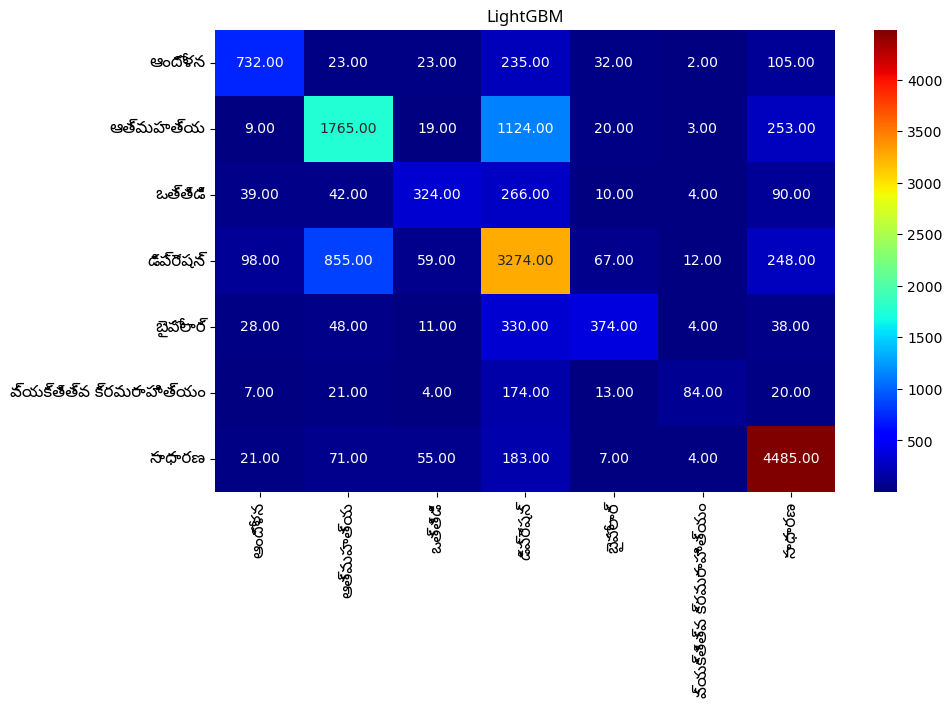

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.font_manager as fm

# Define the Telugu font path
telugu_font_path = r"C:\Users\jyoth\Downloads\Noto_Sans_Telugu\NotoSansTelugu-VariableFont_wdth,wght.ttf"

# Load the Telugu font
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# Predict labels
y_pred = lightGbm.predict(test_x)

# Print classification report
print(classification_report(test_y, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Get Telugu labels correctly
ticks_label = label_encoder.inverse_transform(np.unique(test_y))

# Plot heatmap
plt.figure(figsize=(10,6))
plt.title('LightGBM', fontproperties=telugu_font)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='jet', xticklabels=ticks_label, yticklabels=ticks_label)

# Apply Telugu font to tick labels
plt.xticks(fontproperties=telugu_font)
plt.yticks(fontproperties=telugu_font)

# Show plot
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(n_estimators=50,random_state=7)
randomforest_model.fit(train_x,train_y)

RandomForestClassifier(n_estimators=50, random_state=7)

              precision    recall  f1-score   support

           0       0.80      0.41      0.55      1152
           1       0.53      0.38      0.44      3193
           2       0.90      0.18      0.30       775
           3       0.49      0.73      0.58      4613
           4       0.89      0.21      0.33       833
           5       1.00      0.21      0.34       323
           6       0.79      0.92      0.85      4826

    accuracy                           0.63     15715
   macro avg       0.77      0.43      0.49     15715
weighted avg       0.67      0.63      0.60     15715



C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LET

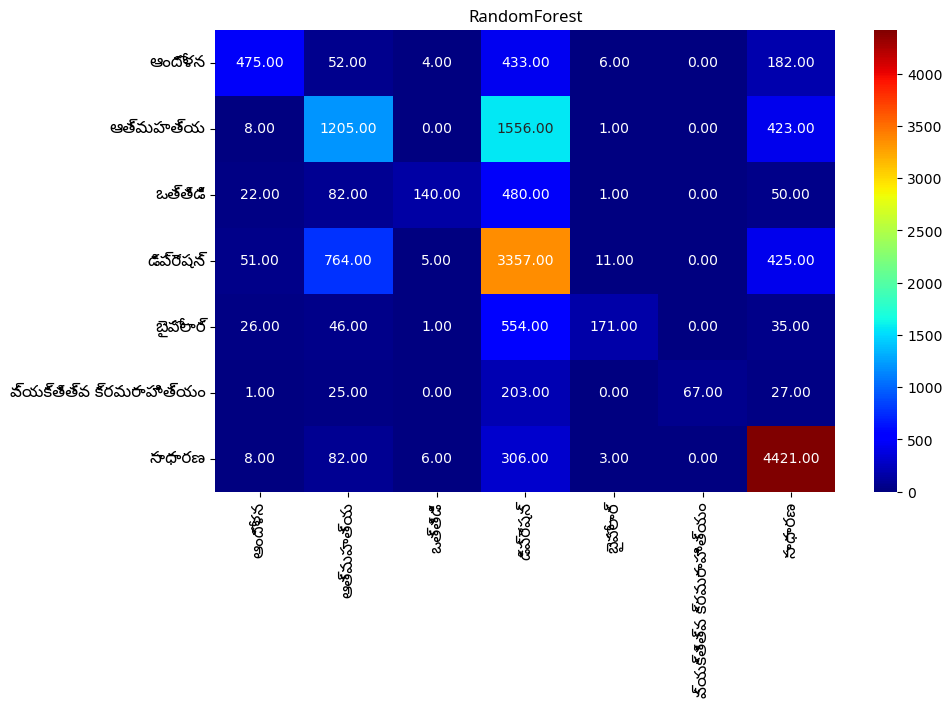

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.font_manager as fm

# Define the Telugu font path
telugu_font_path = r"C:\Users\jyoth\Downloads\Noto_Sans_Telugu\NotoSansTelugu-VariableFont_wdth,wght.ttf"

# Load the Telugu font
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# Predict labels using RandomForest
y_pred = randomforest_model.predict(test_x)

# Print classification report
print(classification_report(test_y, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Get Telugu labels correctly
ticks_label = label_encoder.inverse_transform(np.unique(test_y))

# Plot heatmap
plt.figure(figsize=(10,6))
plt.title('RandomForest', fontproperties=telugu_font)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='jet', xticklabels=ticks_label, yticklabels=ticks_label)

# Apply Telugu font to tick labels
plt.xticks(fontproperties=telugu_font)
plt.yticks(fontproperties=telugu_font)

# Show plot
plt.show()


In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train the SVM model
svm_clf = LinearSVC()
svm_clf.fit(train_x, train_y)

# 2. Predict on test data
pred_y = svm_clf.predict(test_x)

# 3. Evaluate the model
accuracy = accuracy_score(test_y, pred_y)
report = classification_report(test_y, pred_y)
conf_matrix = confusion_matrix(test_y, pred_y)

# 4. Print evaluation results
print("🔍 SVM Evaluation Results:")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:")
print(report)
print("📉 Confusion Matrix:")
print(conf_matrix)


🔍 SVM Evaluation Results:
✅ Accuracy: 65.30%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62      1152
           1       0.59      0.52      0.55      3193
           2       0.60      0.30      0.40       775
           3       0.56      0.67      0.61      4613
           4       0.50      0.32      0.39       833
           5       0.68      0.05      0.10       323
           6       0.79      0.91      0.85      4826

    accuracy                           0.65     15715
   macro avg       0.63      0.47      0.50     15715
weighted avg       0.65      0.65      0.64     15715

📉 Confusion Matrix:
[[ 644   38   20  227   55    1  167]
 [  17 1649   17 1059   35    0  416]
 [  60   84  234  302   27    2   66]
 [ 137  842   45 3078   84    1  426]
 [  34   69   18  405  263    1   43]
 [  13   38    5  205   16   17   29]
 [  21   85   54  242   44    3 4377]]


C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LET

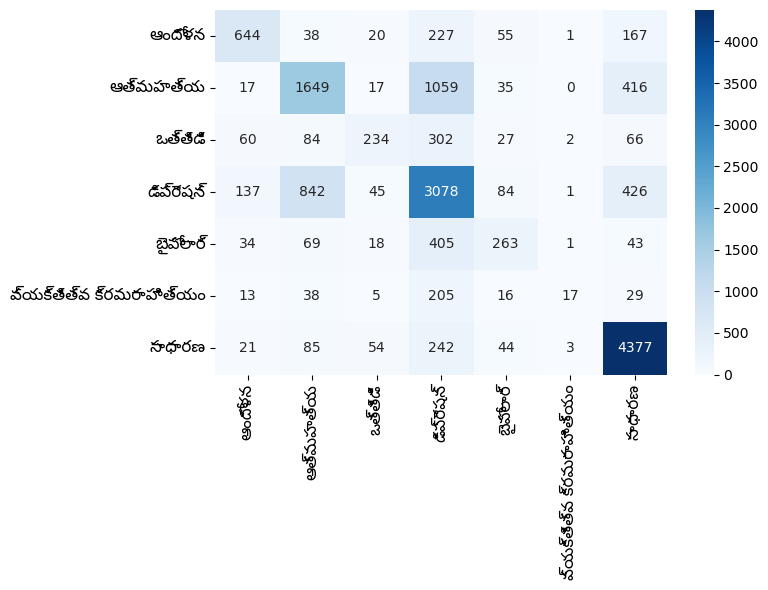

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# === Load Telugu Font ===
telugu_font_path = r"C:\Users\jyoth\Downloads\Noto_Sans_Telugu\NotoSansTelugu-VariableFont_wdth,wght.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# === Telugu Class Labels ===
class_labels = label_encoder.classes_

# === Plot Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Vertical x-axis labels, horizontal y-axis labels
plt.xticks(rotation=90, fontproperties=telugu_font, ha='center')  # vertical x-axis labels
plt.yticks(rotation=0, fontproperties=telugu_font)


plt.tight_layout()
plt.show()


In [28]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# === STEP 1: Split TF-IDF and Dense Features ===
tfidf_dim = tfidf_words.shape[1]
dense_dim = combined_features.shape[1] - tfidf_dim

X_train_tfidf = train_x[:, :tfidf_dim]
X_test_tfidf = test_x[:, :tfidf_dim]

X_train_dense = train_x[:, tfidf_dim:].toarray()
X_test_dense = test_x[:, tfidf_dim:].toarray()

# === STEP 2: Normalize Features ===
tfidf_scaler = MaxAbsScaler()
X_train_tfidf = tfidf_scaler.fit_transform(X_train_tfidf)
X_test_tfidf = tfidf_scaler.transform(X_test_tfidf)

dense_scaler = StandardScaler()
X_train_dense = dense_scaler.fit_transform(X_train_dense)
X_test_dense = dense_scaler.transform(X_test_dense)

# === STEP 3: Prepare Labels ===
train_y = train_y.astype('int32')
test_y = test_y.astype('int32')
num_classes = len(np.unique(train_y))

# === STEP 4: Define Hybrid Classification Model ===
def build_hybrid_classifier(tfidf_dim, dense_dim, num_classes):
    # TF-IDF input
    tfidf_input = Input(shape=(tfidf_dim,), name='tfidf_input')
    x1 = Dense(256, activation='relu')(tfidf_input)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.3)(x1)

    # Dense feature input
    dense_input = Input(shape=(dense_dim,), name='dense_input')
    x2 = Dense(128, activation='relu')(dense_input)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.3)(x2)

    # Merge both branches
    merged = concatenate([x1, x2])
    x = Dense(128, activation='relu')(merged)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=[tfidf_input, dense_input], outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# === STEP 5: Train the Model ===
model = build_hybrid_classifier(tfidf_dim, dense_dim, num_classes)

# Show Model Summary
print("\n=== Model Summary ===")
model.summary()

# Compute class weights to handle class imbalance
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_y), y=train_y)
class_weight = dict(zip(np.unique(train_y), weights))

# Train the model without EarlyStopping
history = model.fit(
    [X_train_tfidf.toarray(), X_train_dense],
    train_y,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    class_weight=class_weight,
    verbose=1
)



=== Model Summary ===


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ tfidf_input         │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_input         │ (None, 774)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    256,256 │ tfidf_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     99,200 │ dense_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     49,280 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 7)         │        903 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 407,175 (1.55 MB)

 Trainable params: 406,407 (1.55 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3095 - loss: 1.9938 - val_accuracy: 0.5034 - val_loss: 1.3138
Epoch 2/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4822 - loss: 1.4332 - val_accuracy: 0.5564 - val_loss: 1.1654
Epoch 3/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5413 - loss: 1.2203 - val_accuracy: 0.5824 - val_loss: 1.0990
Epoch 4/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5778 - loss: 1.0886 - val_accuracy: 0.6005 - val_loss: 1.0618
Epoch 5/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5986 - loss: 1.0115 - val_accuracy: 0.6087 - val_loss: 1.0298
Epoch 6/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6276 - loss: 0.9081 - val_accuracy: 0.6230 - val_loss: 0.9981
Epoch 7/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6352 - loss: 0.8570 - val_accuracy: 0.6346 - val_loss: 0.9636
Epoch 8/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6516 - loss: 0.8028 - val_accura

492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1152
           1       0.59      0.65      0.62      3193
           2       0.46      0.51      0.49       775
           3       0.65      0.55      0.59      4613
           4       0.51      0.61      0.56       833
           5       0.44      0.37      0.40       323
           6       0.89      0.90      0.89      4826

    accuracy                           0.69     15715
   macro avg       0.60      0.62      0.61     15715
weighted avg       0.69      0.69      0.69     15715

Confusion Matrix:
 [[ 827   28   45   94   80   11   67]
 [  35 2086   57  744   76   23  172]
 [  65   53  398  155   36   13   55]
 [ 187 1170  198 2528  236   78  216]
 [  41   66   25  151  508   12   30]
 [  11   35   19   97   20  121   20]
 [  70  119  123  127   34   20 4333]]
Accuracy Score: 0.6873051224944321


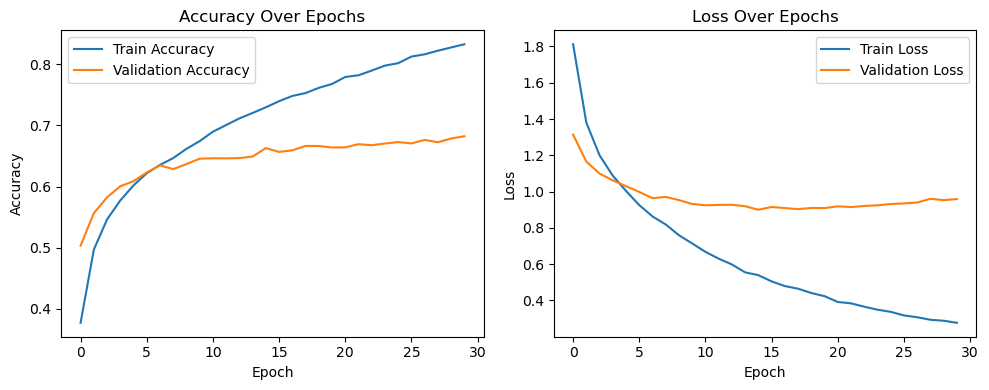

✅ Model saved as 'hybrid_classifier_model.h5'


In [30]:
# === STEP 6: Evaluate Model ===
y_pred_probs = model.predict([X_test_tfidf.toarray(), X_test_dense])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Accuracy Score:", accuracy_score(test_y, y_pred))

# === STEP 7: Plot Accuracy and Loss ===
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === STEP 8: Save the Model ===
model.save("hybrid_classifier_model.h5")
print("✅ Model saved as 'hybrid_classifier_model.h5'")


492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1152
           1       0.59      0.65      0.62      3193
           2       0.46      0.51      0.49       775
           3       0.65      0.55      0.59      4613
           4       0.51      0.61      0.56       833
           5       0.44      0.37      0.40       323
           6       0.89      0.90      0.89      4826

    accuracy                           0.69     15715
   macro avg       0.60      0.62      0.61     15715
weighted avg       0.69      0.69      0.69     15715

Confusion Matrix:
 [[ 827   28   45   94   80   11   67]
 [  35 2086   57  744   76   23  172]
 [  65   53  398  155   36   13   55]
 [ 187 1170  198 2528  236   78  216]
 [  41   66   25  151  508   12   30]
 [  11   35   19   97   20  121   20]
 [  70  119  123  127   34   20 4333]]
Accuracy Score: 0.6873051224944321


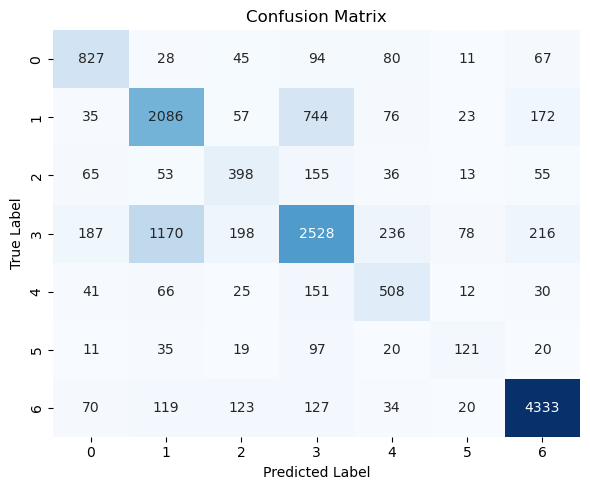

In [31]:
# === STEP 6: Evaluate Model ===
y_pred_probs = model.predict([X_test_tfidf.toarray(), X_test_dense])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Accuracy Score:", accuracy_score(test_y, y_pred))

# === Plot Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1152
           1       0.59      0.65      0.62      3193
           2       0.46      0.51      0.49       775
           3       0.65      0.55      0.59      4613
           4       0.51      0.61      0.56       833
           5       0.44      0.37      0.40       323
           6       0.89      0.90      0.89      4826

    accuracy                           0.69     15715
   macro avg       0.60      0.62      0.61     15715
weighted avg       0.69      0.69      0.69     15715

Confusion Matrix:
 [[ 827   28   45   94   80   11   67]
 [  35 2086   57  744   76   23  172]
 [  65   53  398  155   36   13   55]
 [ 187 1170  198 2528  236   78  216]
 [  41   66   25  151  508   12   30]
 [  11   35   19   97   20  121   20]
 [  70  119  123  127   34   20 4333]]
Accuracy Score: 0.6873051224944321


C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\jyoth\anaconda3\envs\nlp_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LET

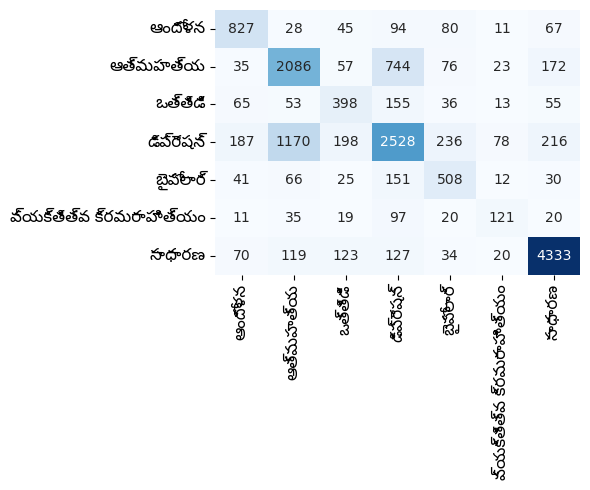

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# === STEP 6: Evaluate Model ===
y_pred_probs = model.predict([X_test_tfidf.toarray(), X_test_dense])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Accuracy Score:", accuracy_score(test_y, y_pred))

# === Load Telugu Font ===
telugu_font_path = r"C:\Users\jyoth\Downloads\Noto_Sans_Telugu\NotoSansTelugu-VariableFont_wdth,wght.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# === Get Telugu Labels from Label Encoder ===
class_labels = label_encoder.classes_

# === Plot Confusion Matrix with Telugu Labels ===
plt.figure(figsize=(6, 5))
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)



plt.xticks(rotation=90, fontproperties=telugu_font)
plt.yticks(rotation=0, fontproperties=telugu_font)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

# Decode the labels
actual_labels = label_encoder.inverse_transform(test_y[:10])
predicted_labels = label_encoder.inverse_transform(y_pred[:10])

# Create DataFrame
results_df = pd.DataFrame({
    'Predicted Labels': predicted_labels,
    'Actual Labels': actual_labels
})

# Print as a clean DataFrame (like screenshot)
print("First 10 Predictions:\n")
print(results_df)


First 10 Predictions:

          Predicted Labels Actual Labels
0                   సాధారణ        సాధారణ
1                డిప్రెషన్      బైపోలార్
2                 బైపోలార్     డిప్రెషన్
3  వ్యక్తిత్వ క్రమరాహిత్యం        సాధారణ
4                   సాధారణ        సాధారణ
5                 ఆత్మహత్య      ఆత్మహత్య
6                డిప్రెషన్     డిప్రెషన్
7                డిప్రెషన్     డిప్రెషన్
8                   సాధారణ        సాధారణ
9                   సాధారణ        సాధారణ


In [34]:
import pandas as pd

# Decode the labels
actual_labels = label_encoder.inverse_transform(test_y[10:20])
predicted_labels = label_encoder.inverse_transform(y_pred[10:20])

# Create DataFrame
results_df = pd.DataFrame({
    'Predicted Labels': predicted_labels,
    'Actual Labels': actual_labels
})

# Print as a clean DataFrame (like screenshot)
print("First 10 Predictions:\n")
print(results_df)


First 10 Predictions:

  Predicted Labels Actual Labels
0          ఒత్తిడి     డిప్రెషన్
1        డిప్రెషన్       ఒత్తిడి
2         ఆత్మహత్య      ఆత్మహత్య
3         ఆత్మహత్య     డిప్రెషన్
4         ఆత్మహత్య     డిప్రెషన్
5        డిప్రెషన్      ఆత్మహత్య
6        డిప్రెషన్     డిప్రెషన్
7        డిప్రెషన్        ఆందోళన
8         ఆత్మహత్య      ఆత్మహత్య
9        డిప్రెషన్     డిప్రెషన్
